<a href="https://colab.research.google.com/github/Venkadesh1863/ProjectsVenky-RIT/blob/main/COVID_19_detection_using_Naive_Bayesian_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import randint
import pandas as pd
import matplotlib.pyplot as plt
from pandas import set_option
plt.style.use('ggplot')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.metrics import classification_report

In [ ]:
covid_19_data = pd.read_csv("/content/covid_19_data.csv")

In [ ]:
print(f'The shape of the dataframe is {covid_19_data.shape}')
print()

The shape of the dataframe is (4247, 8)



In [ ]:
print(covid_19_data.info())
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4247 entries, 0 to 4246
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              4247 non-null   int64  
 1   ObservationDate  4247 non-null   object 
 2   Province/State   2749 non-null   object 
 3   Country/Region   4247 non-null   object 
 4   Last Update      4247 non-null   object 
 5   Confirmed        4247 non-null   float64
 6   Deaths           4247 non-null   float64
 7   Recovered        4247 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 265.6+ KB
None



In [ ]:
covid_19_data.replace(to_replace='?', value=np.NaN, inplace=True)
print(covid_19_data.describe(include='all'))
print()

                SNo ObservationDate Province/State  Country/Region  \
count   4247.000000            4247           2749            4247   
unique          NaN              47            182             111   
top             NaN      03/08/2020          Anhui  Mainland China   
freq            NaN             255             47            1451   
mean    2124.000000             NaN            NaN             NaN   
std     1226.147626             NaN            NaN             NaN   
min        1.000000             NaN            NaN             NaN   
25%     1062.500000             NaN            NaN             NaN   
50%     2124.000000             NaN            NaN             NaN   
75%     3185.500000             NaN            NaN             NaN   
max     4247.000000             NaN            NaN             NaN   

                Last Update     Confirmed       Deaths     Recovered  
count                  4247   4247.000000  4247.000000   4247.000000  
unique           

In [ ]:
print(covid_19_data['Country/Region'].value_counts())
print(covid_19_data.isnull().sum())

Mainland China         1451
US                      783
Australia               201
Canada                  133
Taiwan                   47
                       ... 
Ivory Coast               1
Republic of Ireland       1
North Ireland             1
 Azerbaijan               1
Paraguay                  1
Name: Country/Region, Length: 111, dtype: int64
SNo                   0
ObservationDate       0
Province/State     1498
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64


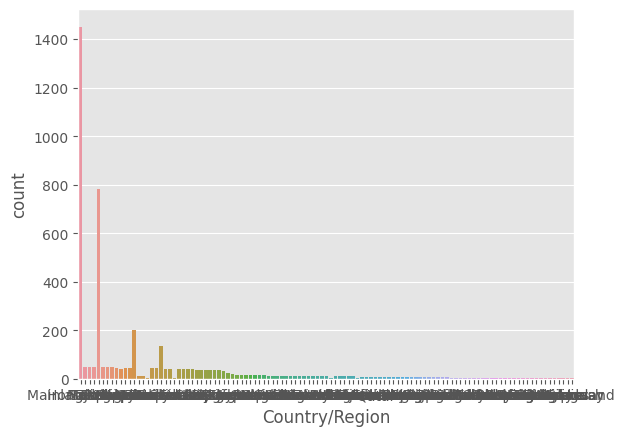

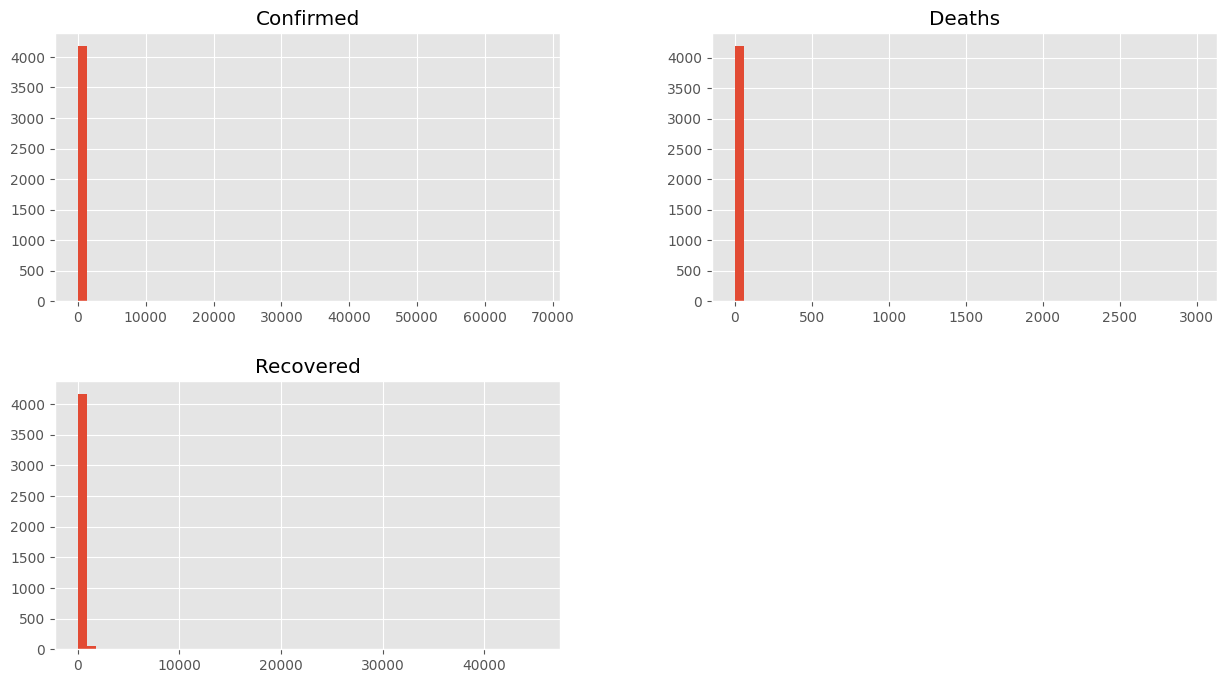

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       408
         1.0       1.00      1.00      1.00        99
         2.0       1.00      1.00      1.00        43
         3.0       1.00      1.00      1.00        11
         4.0       1.00      1.00      1.00        14
         5.0       1.00      1.00      1.00         8
         6.0       1.00      1.00      1.00         4
         7.0       1.00      1.00      1.00         7
         8.0       1.00      1.00      1.00         8
         9.0       1.00      1.00      1.00         8
        10.0       1.00      1.00      1.00         7
        11.0       1.00      1.00      1.00         3
        12.0       1.00      1.00      1.00         9
        13.0       1.00      1.00      1.00         2
        14.0       1.00      1.00      1.00         5
        15.0       1.00      1.00      1.00         4
        16.0       1.00      1.00      1.00         7
        17.0       1.00    

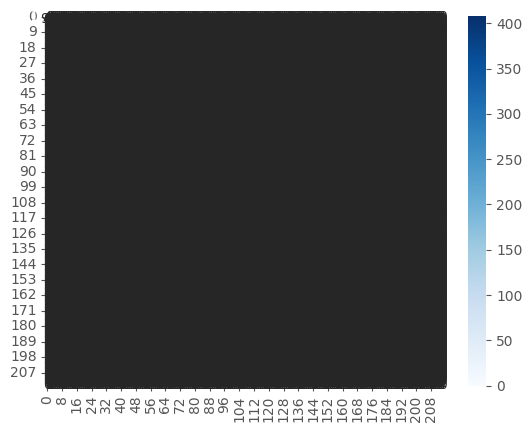

In [ ]:
import seaborn as sns
sns.countplot(x='Country/Region', data=covid_19_data, linewidth=3)
plt.show()
covid_19_data[['ObservationDate', 'Province/State', 'Country/Region','Last Update','Confirmed', 'Deaths', 'Recovered']].hist(bins=50, figsize=(15,8))
plt.show()
covid_19_data['Country/Region'].fillna(covid_19_data['Country/Region'].mode()[0], inplace=True)
covid_19_data['Confirmed'].fillna(covid_19_data['Confirmed'].mode()[0], inplace=True)
X = covid_19_data.drop(['Deaths'],axis=1)
y = covid_19_data.Recovered
X=X[['Confirmed', 'Recovered']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
NB_classifier = GaussianNB()
NB_classifier.fit(X_train, y_train)
y_predict = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, cmap='Blues')
print(classification_report(y_test, y_predict))